In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date 
import seaborn as sns
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("Aquifer_Petrignano.csv")

In [3]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,7/4/2009,0.0,-28.43,-27.97,14.1,13.3,-28618.272,2.5
1,8/4/2009,0.0,-28.47,-27.98,14.5,13.4,-30295.296,2.5
2,9/4/2009,0.2,-28.46,-27.97,14.3,13.9,-30932.928,2.4
3,10/4/2009,0.0,-28.41,-27.90,14.3,13.8,-29541.888,2.4
4,11/4/2009,0.0,-28.33,-27.86,14.4,13.6,-28015.200,2.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4103 entries, 0 to 4102
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  4103 non-null   object 
 1   Rainfall_Bastia_Umbra                 4103 non-null   float64
 2   Depth_to_Groundwater_P24              4064 non-null   float64
 3   Depth_to_Groundwater_P25              4076 non-null   float64
 4   Temperature_Bastia_Umbra              4103 non-null   float64
 5   Temperature_Petrignano                4103 non-null   float64
 6   Volume_C10_Petrignano                 4102 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4103 non-null   float64
dtypes: float64(7), object(1)
memory usage: 256.6+ KB


In [5]:
df.columns = ['date', 'rainfall', 'gdepth_p24', 'gdepth_p25', 'temp_bastia', 'temp_petri', 'volume', 'hydrometry']

In [6]:
df.describe()

,rainfall,gdepth_p24,gdepth_p25,temp_bastia,temp_petri,volume,hydrometry
count,4103.000000,4064.000000,4076.000000,4103.000000,4103.000000,4102.000000,4103.000000
mean,1.579527,-25.612717,-25.083957,15.219912,13.905630,-28707.191122,2.369998
std,5.270382,2.998257,2.904306,7.762840,7.691288,4600.559012,0.595222
min,0.000000,-34.470000,-33.710000,-3.700000,-4.200000,-41890.176000,0.000000
25%,0.000000,-27.282500,-26.670000,9.100000,7.900000,-31178.088000,2.100000
50%,0.000000,-25.440000,-25.070000,14.900000,13.700000,-28420.848000,2.400000
75%,0.100000,-23.600000,-23.230000,21.500000,20.100000,-26091.288000,2.700000
max,67.300000,-19.660000,-19.100000,33.000000,31.100000,0.000000,4.100000


In [7]:
df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y')

In [8]:
df = df.set_index('date')

Text(0.5, 1.0, 'hydrometry')

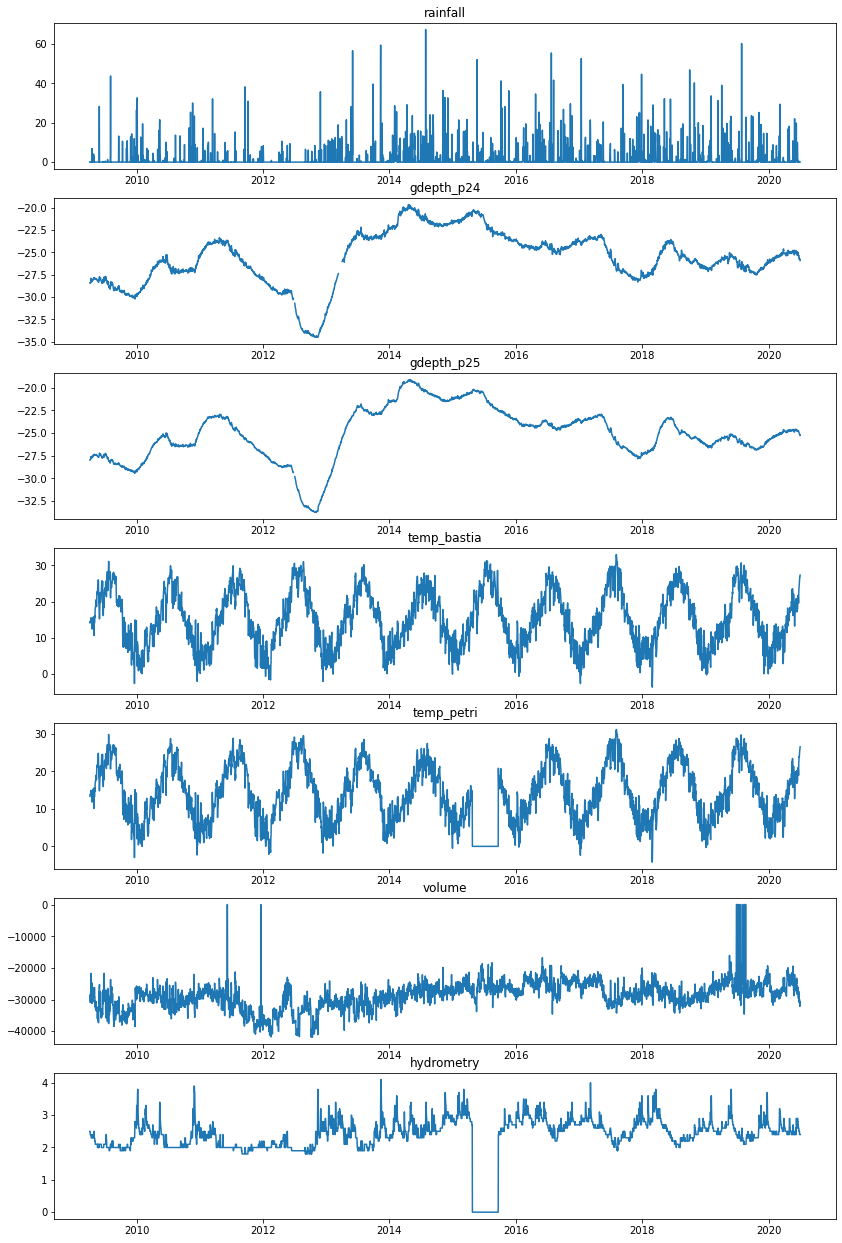

In [9]:
fig, axes = plt.subplots(7,1, figsize=(14,22))

axes[0].plot(df['rainfall'])
axes[0].set_title ('rainfall')
axes[1].plot(df['gdepth_p24'])
axes[1].set_title ('gdepth_p24')
axes[2].plot(df['gdepth_p25'])
axes[2].set_title ('gdepth_p25')
axes[3].plot(df['temp_bastia'])
axes[3].set_title ('temp_bastia')
axes[4].plot(df['temp_petri'])
axes[4].set_title ('temp_petri')
axes[5].plot(df['volume'])
axes[5].set_title ('volume')
axes[6].plot(df['hydrometry'])
axes[6].set_title ('hydrometry')

### Checking for Duplicated and Irregular Timestamp

In [10]:
df = df.reset_index()

In [11]:
df.head()

,date,rainfall,gdepth_p24,gdepth_p25,temp_bastia,temp_petri,volume,hydrometry
0,2009-04-07,0.0,-28.43,-27.97,14.1,13.3,-28618.272,2.5
1,2009-04-08,0.0,-28.47,-27.98,14.5,13.4,-30295.296,2.5
2,2009-04-09,0.2,-28.46,-27.97,14.3,13.9,-30932.928,2.4
3,2009-04-10,0.0,-28.41,-27.90,14.3,13.8,-29541.888,2.4
4,2009-04-11,0.0,-28.33,-27.86,14.4,13.6,-28015.200,2.4


In [12]:
df['shift_day'] = df['date'] - df['date'].shift(1)
df['shift_day'].head()

0      NaT
1   1 days
2   1 days
3   1 days
4   1 days
Name: shift_day, dtype: timedelta64[ns]

In [13]:
df[df['shift_day'] != '1 days']

,date,rainfall,gdepth_p24,gdepth_p25,temp_bastia,temp_petri,volume,hydrometry,shift_day
0,2009-04-07,0.0,-28.43,-27.97,14.1,13.3,-28618.272,2.5,NaT


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4103 entries, 0 to 4102
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   date         4103 non-null   datetime64[ns] 
 1   rainfall     4103 non-null   float64        
 2   gdepth_p24   4064 non-null   float64        
 3   gdepth_p25   4076 non-null   float64        
 4   temp_bastia  4103 non-null   float64        
 5   temp_petri   4103 non-null   float64        
 6   volume       4102 non-null   float64        
 7   hydrometry   4103 non-null   float64        
 8   shift_day    4102 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(7), timedelta64[ns](1)
memory usage: 288.6 KB


### Handling Missing data

In [15]:
df.isnull().sum()

date            0
rainfall        0
gdepth_p24     39
gdepth_p25     27
temp_bastia     0
temp_petri      0
volume          1
hydrometry      0
shift_day       1
dtype: int64

In [16]:
df = df.drop('shift_day', axis=1)

In [17]:
df_preprocess = df.copy()

### Filling the missing values by Interpolation

In [18]:
df_preprocess['gdepth_p24'] = df_preprocess['gdepth_p24'].interpolate()
df_preprocess['gdepth_p25'] = df_preprocess['gdepth_p25'].interpolate()
df_preprocess['volume'] = df_preprocess['volume'].interpolate()

In [19]:
df_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4103 entries, 0 to 4102
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4103 non-null   datetime64[ns]
 1   rainfall     4103 non-null   float64       
 2   gdepth_p24   4103 non-null   float64       
 3   gdepth_p25   4103 non-null   float64       
 4   temp_bastia  4103 non-null   float64       
 5   temp_petri   4103 non-null   float64       
 6   volume       4103 non-null   float64       
 7   hydrometry   4103 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 256.6 KB


In [20]:
df_preprocess.isnull().sum()

date           0
rainfall       0
gdepth_p24     0
gdepth_p25     0
temp_bastia    0
temp_petri     0
volume         0
hydrometry     0
dtype: int64

In [21]:
df_preprocess.corr()

,rainfall,gdepth_p24,gdepth_p25,temp_bastia,temp_petri,volume,hydrometry
rainfall,1.000000,0.070687,0.064112,-0.059025,-0.042470,0.138957,0.142600
gdepth_p24,0.070687,1.000000,0.996754,0.058937,-0.090402,0.423443,0.029357
gdepth_p25,0.064112,0.996754,1.000000,0.077946,-0.074290,0.385120,0.008570
temp_bastia,-0.059025,0.058937,0.077946,1.000000,0.831262,-0.061248,-0.438071
temp_petri,-0.042470,-0.090402,-0.074290,0.831262,1.000000,-0.114997,0.009745
volume,0.138957,0.423443,0.385120,-0.061248,-0.114997,1.000000,0.215876
hydrometry,0.142600,0.029357,0.008570,-0.438071,0.009745,0.215876,1.000000


### Seasonal decomposition

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

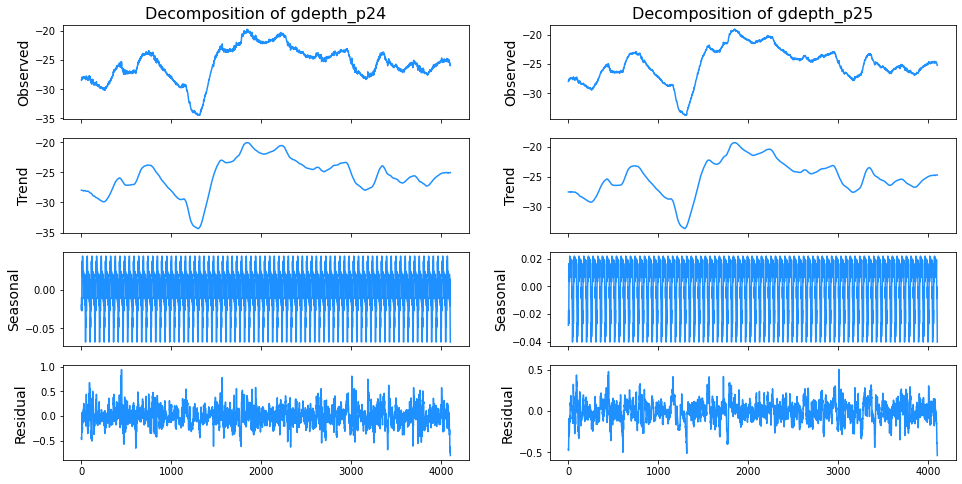

In [23]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['gdepth_p24','gdepth_p25']):
    
    res = seasonal_decompose(df_preprocess[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()


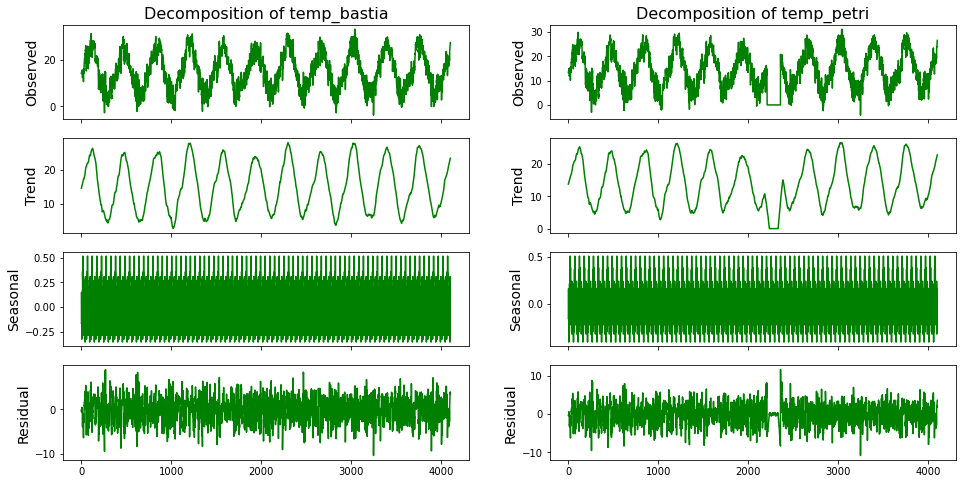

In [24]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['temp_bastia','temp_petri']):
    
    res = seasonal_decompose(df_preprocess[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='green')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='green')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='green')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='green')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

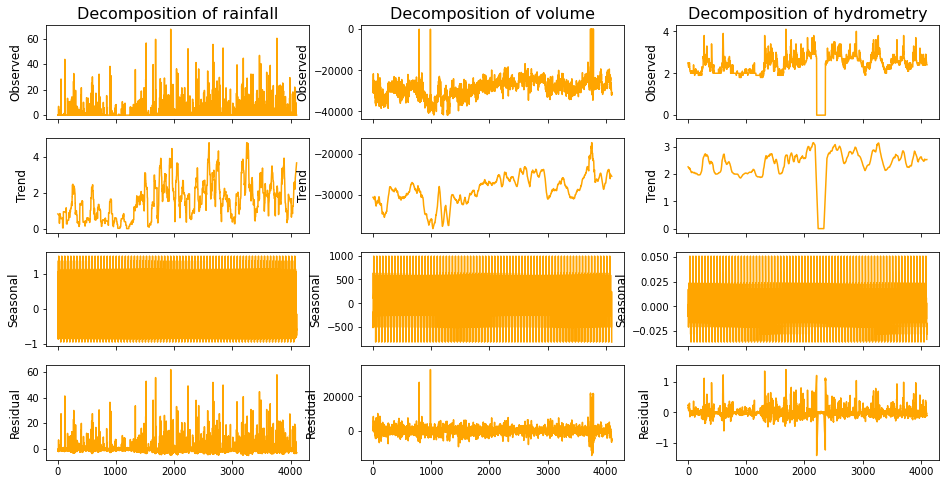

In [25]:
fig, ax = plt.subplots(ncols=3, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['rainfall','volume', 'hydrometry']):
    
    res = seasonal_decompose(df_preprocess[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='orange')
    ax[0,i].set_ylabel('Observed', fontsize=12)

    res.trend.plot(ax=ax[1,i], legend=False, color='orange')
    ax[1,i].set_ylabel('Trend', fontsize=12)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='orange')
    ax[2,i].set_ylabel('Seasonal', fontsize=12)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='orange')
    ax[3,i].set_ylabel('Residual', fontsize=12)

plt.show()

In [26]:
from statsmodels.tsa.stattools import adfuller
# ADF stationarity test
#rainfall	gdepth_p24	gdepth_p25	temp_bastia	temp_petri	volume	volume
# Returns: {Test statistic, P-value, Num lags used, {Critical values}, Estmation of maximized information criteria}
result_rainfall = adfuller(df_preprocess['rainfall'].values)
result_p24 = adfuller(df_preprocess['gdepth_p24'].values)
result_p25 = adfuller(df_preprocess['gdepth_p25'].values)
result_temp_bastia = adfuller(df_preprocess['temp_bastia'].values)
result_temp_petri = adfuller(df_preprocess['temp_petri'].values)
result_volume = adfuller(df_preprocess['volume'].values)
result_hydrometry = adfuller(df_preprocess['hydrometry'].values)


print("P-value for the rainfall is:", result_rainfall[1])
print("P-value for the depth to groundwater p24 is:", result_p24[1])

print("P-value for the depth to groundwater p25 is:", result_p25[1])
print("P-value for the temperature in bastia is:", result_temp_bastia[1])

print("P-value for the temperature in Petrignano is:", result_temp_petri[1])
print("P-value for the Volume is:", result_volume[1])

print("P-value for the Hydromtry is:", result_hydrometry[1])


P-value for the rainfall is: 0.0
P-value for the depth to groundwater p24 is: 0.12136888150234548
P-value for the depth to groundwater p25 is: 0.04984102260204278
P-value for the temperature in bastia is: 0.0015147813416613565
P-value for the temperature in Petrignano is: 0.0066499425201503
P-value for the Volume is: 0.0015522224350274084
P-value for the Hydromtry is: 6.467332957724514e-05


#### p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#### p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
Here the P-value for P24 is greater than 0.05 which indicates that it is non-stationary

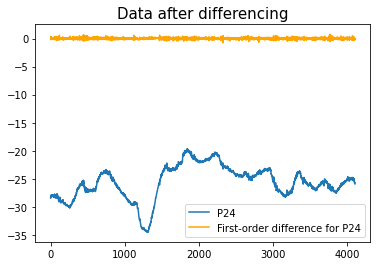

In [27]:
df_preprocess['gdepth_p24_diff1'] = df_preprocess['gdepth_p24'].diff()

plt.title('Data after differencing', size=15)
plt.plot(df_preprocess['gdepth_p24'], label='P24',)

plt.plot(df_preprocess['gdepth_p24_diff1'], label='First-order difference for P24', color='orange')
plt.legend(loc='lower right');

In [28]:
df_preprocess = df_preprocess.set_index('date')

In [30]:
result_diff_p24 = adfuller(df_preprocess.dropna().gdepth_p24_diff1.values)
print("P-value: ", result_diff_p24[1])

P-value:  2.4244741043052084e-08


### Univariate analysis using ARIMA for two target variables: P24 & P25

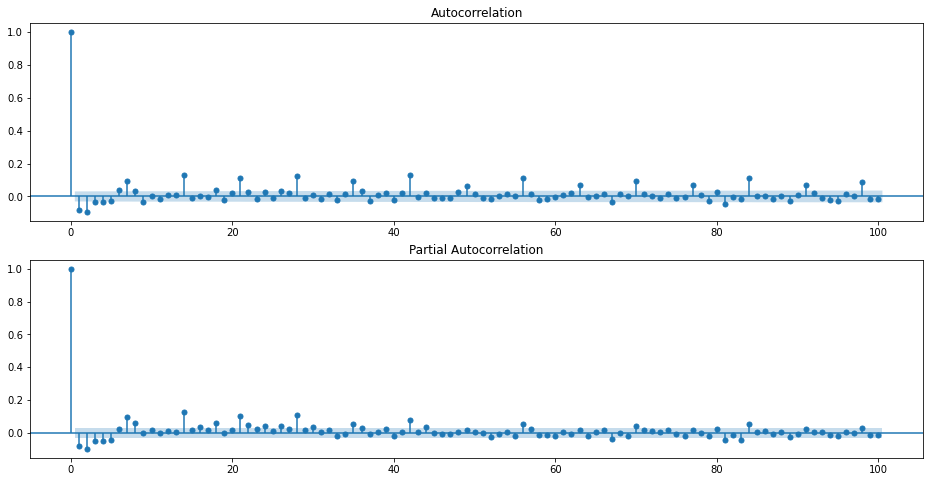

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df_preprocess.dropna().gdepth_24_diff1, lags=100, ax=ax[0])
plot_pacf(df_preprocess.dropna().gdepth_p24_diff1, lags=100, ax=ax[1])

plt.show()

### Train Test Split for TimeSeries

In [32]:
df_preprocess = df_preprocess.reset_index()

In [33]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df_preprocess['date']
y = df_preprocess['gdepth_p24']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

In [34]:
train_size = int(0.85 * len(df_preprocess))
test_size = len(df_preprocess) - train_size

univariate_df_p24 = df_preprocess[['date', 'gdepth_p24']].copy()

train = univariate_df_p24.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df_p24.iloc[:train_size, 0]), pd.DataFrame(univariate_df_p24.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df_p24.iloc[train_size:, 0]), pd.DataFrame(univariate_df_p24.iloc[train_size:, 1])

print(len(train), len(x_valid))

3487 616


In [35]:
from statsmodels.tsa.arima_model import ARIMA

# Fit model
model = ARIMA(y_train, order=(1,1,1)) # (p,d,q)
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.gdepth_p24   No. Observations:                 3486
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2282.559
Method:                       css-mle   S.D. of innovations              0.126
Date:                Sat, 16 Jul 2022   AIC                          -4557.117
Time:                        11:09:56   BIC                          -4532.491
Sample:                             1   HQIC                         -4548.327
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0007      0.002      0.413      0.680      -0.003       0.004
ar.L1.D.gdepth_p24     0.4848      0.060      8.086      0.000       0.367       0.602
ma.L1.D.gdepth_p24  

In [38]:
# Fit model using p=6 and q=9
model = ARIMA(y_train, order=(6,1,9))
model_fit_12 = model.fit()
print(model_fit_12.summary())

C:\Users\suraj\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\suraj\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                             ARIMA Model Results                              
Dep. Variable:           D.gdepth_p24   No. Observations:                 3486
Model:                 ARIMA(6, 1, 9)   Log Likelihood                2435.408
Method:                       css-mle   S.D. of innovations              0.120
Date:                Sat, 16 Jul 2022   AIC                          -4836.817
Time:                        11:19:06   BIC                          -4732.156
Sample:                             1   HQIC                         -4799.457
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0003      0.004     -0.063      0.950      -0.009       0.008
ar.L1.D.gdepth_p24     0.7917      0.004    186.587      0.000       0.783       0.800
ar.L2.D.gdepth_p24  

In [89]:
# Fit model p=6 q=6
model = ARIMA(y_train, order=(6,1,6))
model_fit_6 = model.fit()
print(model_fit_6.summary())

C:\Users\suraj\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\suraj\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                             ARIMA Model Results                              
Dep. Variable:           D.gdepth_p24   No. Observations:                 3486
Model:                 ARIMA(6, 1, 6)   Log Likelihood                2398.272
Method:                       css-mle   S.D. of innovations              0.122
Date:                Sat, 16 Jul 2022   AIC                          -4768.544
Time:                        12:25:14   BIC                          -4682.353
Sample:                             1   HQIC                         -4737.777
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0013      0.005      0.282      0.778      -0.008       0.011
ar.L1.D.gdepth_p24     0.6449      0.006    111.994      0.000       0.634       0.656
ar.L2.D.gdepth_p24  

In [90]:
# Prediction with ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

y_pred, se, conf = model_fit.forecast(616)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print('RMSE: {}'.format(score_rmse))

RMSE: 0.7283911185819509


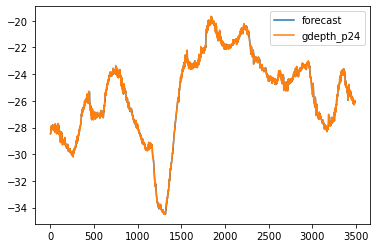

In [91]:
model_fit_6.plot_predict()
plt.show()

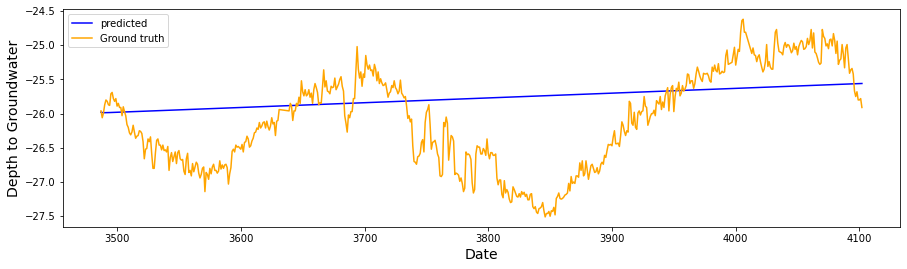

In [92]:
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

sns.lineplot(x=x_valid.index, y=y_pred, ax=ax, color='blue', label='predicted') #navajowhite
sns.lineplot(x=x_valid.index, y=y_valid['gdepth_p24'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

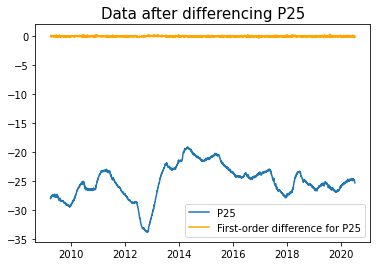

In [95]:
df_preprocess['gdepth_p25_diff1'] = df_preprocess['gdepth_p25'].diff()

plt.title('Data after differencing P25', size=15)
plt.plot(df_preprocess['gdepth_p25'], label='P25',)

plt.plot(df_preprocess['gdepth_p25_diff1'], label='First-order difference for P25', color='orange')
plt.legend(loc='lower right');

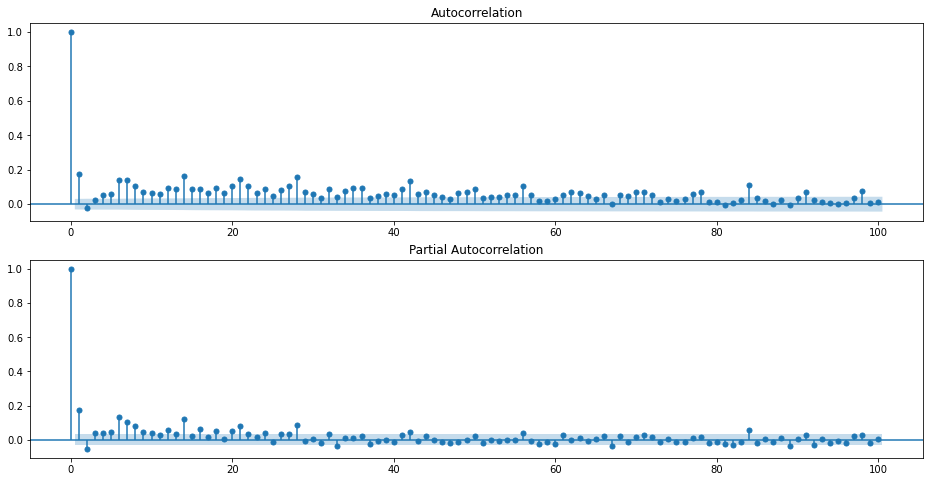

In [96]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df_preprocess.dropna().gdepth_p25_diff1, lags=100, ax=ax[0])
plot_pacf(df_preprocess.dropna().gdepth_p25_diff1, lags=100, ax=ax[1])

plt.show()

In [98]:
df_preprocess = df_preprocess.reset_index()

In [100]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df_preprocess['date']
y = df_preprocess['gdepth_p25']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

In [101]:
train_size = int(0.85 * len(df_preprocess))
test_size = len(df_preprocess) - train_size

univariate_df_p25 = df_preprocess[['date', 'gdepth_p25']].copy()

train = univariate_df_p25.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df_p25.iloc[:train_size, 0]), pd.DataFrame(univariate_df_p25.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df_p25.iloc[train_size:, 0]), pd.DataFrame(univariate_df_p25.iloc[train_size:, 1])

print(len(train), len(x_valid))

3487 616


In [102]:
from statsmodels.tsa.arima_model import ARIMA

# Fit model
model = ARIMA(y_train, order=(1,1,1)) # (p,d,q)
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.gdepth_p25   No. Observations:                 3486
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4777.978
Method:                       css-mle   S.D. of innovations              0.061
Date:                Sat, 16 Jul 2022   AIC                          -9547.955
Time:                        12:34:14   BIC                          -9523.329
Sample:                             1   HQIC                         -9539.165
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0007      0.001      0.554      0.579      -0.002       0.003
ar.L1.D.gdepth_p25    -0.0724      0.078     -0.927      0.354      -0.225       0.081
ma.L1.D.gdepth_p25  

In [103]:
y_pred, se, conf = model_fit.forecast(616)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print('RMSE: {}'.format(score_rmse))

RMSE: 0.6939061437820534


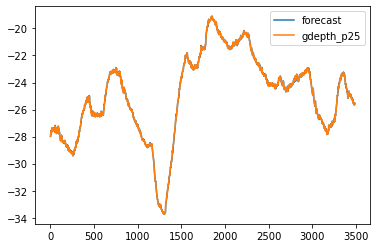

In [104]:
model_fit.plot_predict()
plt.show()

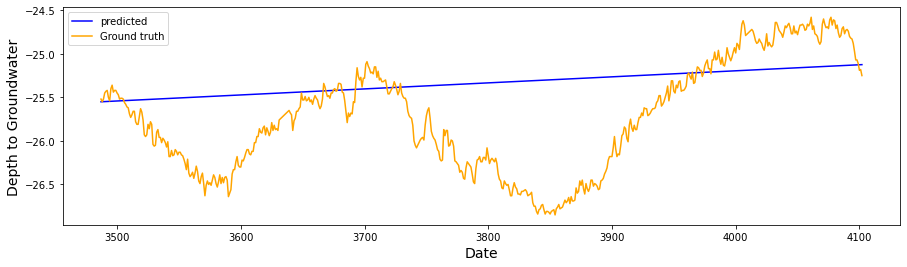

In [105]:
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

sns.lineplot(x=x_valid.index, y=y_pred, ax=ax, color='blue', label='predicted') #navajowhite
sns.lineplot(x=x_valid.index, y=y_valid['gdepth_p25'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

### Mutivariate analysis using VAR 

In [106]:
df_preprocess.head()

,date,rainfall,gdepth_p24,gdepth_p25,temp_bastia,temp_petri,volume,hydrometry,gdepth_p24_diff1,depth_to_groundwater_diff_1,gdepth_p25_diff1
0,2009-04-07,0.0,-28.43,-27.97,14.1,13.3,-28618.272,2.5,NaN,0.00,NaN
1,2009-04-08,0.0,-28.47,-27.98,14.5,13.4,-30295.296,2.5,-0.04,-0.04,-0.01
2,2009-04-09,0.2,-28.46,-27.97,14.3,13.9,-30932.928,2.4,0.01,0.01,0.01
3,2009-04-10,0.0,-28.41,-27.90,14.3,13.8,-29541.888,2.4,0.05,0.05,0.07
4,2009-04-11,0.0,-28.33,-27.86,14.4,13.6,-28015.200,2.4,0.08,0.08,0.04


In [107]:
multivariate_df = df_preprocess[['date','rainfall','gdepth_p24','gdepth_p25','temp_bastia','temp_petri','volume','hydrometry']]

In [109]:
multivariate_df = multivariate_df.set_index('date')
multivariate_df.head()

,rainfall,gdepth_p24,gdepth_p25,temp_bastia,temp_petri,volume,hydrometry
date,,,,,,,
2009-04-07,0.0,-28.43,-27.97,14.1,13.3,-28618.272,2.5
2009-04-08,0.0,-28.47,-27.98,14.5,13.4,-30295.296,2.5
2009-04-09,0.2,-28.46,-27.97,14.3,13.9,-30932.928,2.4
2009-04-10,0.0,-28.41,-27.90,14.3,13.8,-29541.888,2.4
2009-04-11,0.0,-28.33,-27.86,14.4,13.6,-28015.200,2.4


In [111]:
#creating the train and validation set
train = multivariate_df[:int(0.8*(len(multivariate_df)))]
valid = multivariate_df[int(0.8*(len(multivariate_df))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

var_model = VAR(endog=train)
model_fit = var_model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

C:\Users\suraj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [114]:
#converting predictions to dataframe
import math
cols = multivariate_df.columns

pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,7):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for rainfall is :  5.625638342807284
rmse value for gdepth_p24 is :  1.24817742451855
rmse value for gdepth_p25 is :  1.3682826623623345
rmse value for temp_bastia is :  7.778279894275
rmse value for temp_petri is :  7.521827354742426
rmse value for volume is :  5723.778593837267
rmse value for hydrometry is :  0.29924395078258026


In [115]:
#make final predictions
model = VAR(endog=multivariate_df)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[ 1.33904275e+00 -2.59225036e+01 -2.52688345e+01  2.67281545e+01
   2.60103072e+01 -3.10612081e+04  2.37448164e+00]]


C:\Users\suraj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [116]:
multivariate_df.head()

,rainfall,gdepth_p24,gdepth_p25,temp_bastia,temp_petri,volume,hydrometry
date,,,,,,,
2009-04-07,0.0,-28.43,-27.97,14.1,13.3,-28618.272,2.5
2009-04-08,0.0,-28.47,-27.98,14.5,13.4,-30295.296,2.5
2009-04-09,0.2,-28.46,-27.97,14.3,13.9,-30932.928,2.4
2009-04-10,0.0,-28.41,-27.90,14.3,13.8,-29541.888,2.4
2009-04-11,0.0,-28.33,-27.86,14.4,13.6,-28015.200,2.4


In [117]:
# 1st difference
multivariate_df_diff = multivariate_df.diff().dropna()

In [118]:
multivariate_df_diff.head()

,rainfall,gdepth_p24,gdepth_p25,temp_bastia,temp_petri,volume,hydrometry
date,,,,,,,
2009-04-08,0.0,-0.04,-0.01,0.4,0.1,-1677.024,0.0
2009-04-09,0.2,0.01,0.01,-0.2,0.5,-637.632,-0.1
2009-04-10,-0.2,0.05,0.07,0.0,-0.1,1391.040,0.0
2009-04-11,0.0,0.08,0.04,0.1,-0.2,1526.688,0.0
2009-04-12,0.0,0.07,0.10,0.5,0.6,3495.744,0.0


In [127]:
# model fitting
model = VAR(multivariate_df_diff)
x= model.select_order()
x.summary()


C:\Users\suraj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


,AIC,BIC,FPE,HQIC
0,5.415,5.426,224.7,5.419
1,4.625,4.711,102.0,4.655
2,4.390,4.553,80.67,4.448
3,4.235,4.473,69.03,4.319
4,4.138,4.453*,62.70,4.250
5,4.085,4.476,59.45,4.223
6,4.020,4.487,55.73,4.186
7,3.994,4.536,54.26,4.186
8,3.935,4.553,51.14,4.154*
9,3.918,4.613,50.32,4.164


In [128]:
results = model.fit(maxlags=15, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 16, Jul, 2022
Time:                     13:14:00
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    4.99487
Nobs:                     4087.00    HQIC:                   4.25427
Log likelihood:          -47716.4    FPE:                    46.9158
AIC:                      3.84827    Det(Omega_mle):         39.2173
--------------------------------------------------------------------
Results for equation rainfall
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.002503         0.082950            0.030           0.976
L1.rainfall            -0.828552         0.017017          -48.690           0.000
L1.gdepth_p24          -2.142121         1.274711

In [129]:
# forecasting
lag_order = results.k_ar
results.forecast(multivariate_df.values[-lag_order:], 5)

array([[ 1.25300534e+02, -1.37962239e+01, -1.75275559e+01,
        -1.11140132e+02, -7.87476321e+01,  1.03194273e+05,
         1.96053079e+00],
       [ 5.60216861e+01, -1.29193261e+01, -1.59327055e+01,
        -1.10917493e+02, -8.93354315e+01,  7.94611722e+04,
         3.24730662e+00],
       [ 7.58135294e+00, -1.38853993e+01, -1.62884032e+01,
        -1.03639093e+02, -8.31721206e+01,  5.59861360e+04,
         3.08953583e+00],
       [ 2.59898026e+01, -1.45519744e+01, -1.64604528e+01,
        -8.07894679e+01, -6.24178969e+01,  2.85769060e+04,
         3.26966027e+00],
       [-3.25566395e+00, -1.49162451e+01, -1.64200333e+01,
        -6.72779771e+01, -5.01354780e+01,  1.60383945e+04,
         3.47860140e+00]])

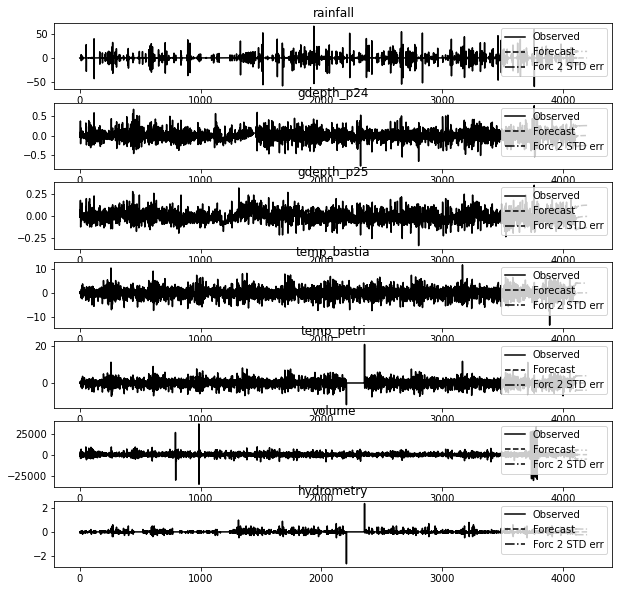

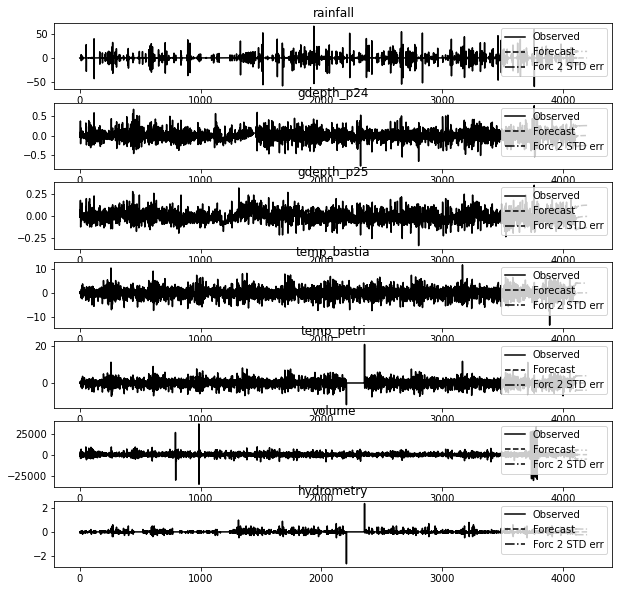

In [133]:
# plotting
results.plot_forecast(100)

### References:
1. https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_forecasting.html
2. https://www.analyticsvidhya.com/blog/2021/08/vector-autoregressive-model-in-python/
3. https://www.kaggle.com/code/ahmedabdulhamid/time-series-analysis-a-complete-guide
4. https://www.projectpro.io/article/how-to-build-arima-model-in-python/544#:~:text=Model%20in%20Python%3F-,ARIMA%20Model%2D%20Complete%20Guide%20to%20Time%20Series%20Forecasting%20in%20Python,data%20to%20predict%20future%20values.
5. https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/
